# Blah blah blah

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sqlite3
%matplotlib inline


In [2]:
connection = sqlite3.connect('../data/db.sqlite')
ratings = pd.read_sql_query("SELECT * FROM ratings", connection)
clean = pd.read_sql_query("SELECT * FROM clean", connection)
dummies = pd.read_sql_query("SELECT * FROM dummies", connection)

connection.close()

## Loading and Preprocessing Loans Encoded Data

In [3]:
clean.head()

,Rating Agency,Rating Date,Binary Rating,SIC Code,Sector,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,...,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,Standard & Poor's Ratings Services,2010-07-30,1,4941.0,Utils,1.1507,0.4551,0.8847,77.6230,19.4839,...,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,Standard & Poor's Ratings Services,2010-09-16,1,7374.0,BusEq,1.1129,0.0072,0.0073,43.6619,19.8327,...,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,Standard & Poor's Ratings Services,2010-11-23,1,5065.0,Shops,1.9276,0.2924,0.4255,11.9008,3.3173,...,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,Standard & Poor's Ratings Services,2010-06-29,1,4941.0,Utils,0.8358,0.4708,0.9491,64.5096,18.4549,...,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,Standard & Poor's Ratings Services,2010-07-14,1,5122.0,Shops,1.2931,0.2644,0.4036,3.8385,1.3269,...,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [4]:
# Define features set
X = clean.copy()
X = X.drop(columns=['Binary Rating', 'Rating Agency', 'Rating Date', 'Sector', 'SIC Code'])
X.head()

,Current Ratio,Long-term Debt / Capital,Debt/Equity Ratio,Gross Margin,Operating Margin,EBIT Margin,EBITDA Margin,Pre-Tax Profit Margin,Net Profit Margin,Asset Turnover,ROE - Return On Equity,Return On Tangible Equity,ROA - Return On Assets,ROI - Return On Investment,Operating Cash Flow Per Share,Free Cash Flow Per Share
0,1.1507,0.4551,0.8847,77.6230,19.4839,19.4839,28.9834,13.6093,8.3224,0.3173,8.1724,8.1978,2.6385,4.4530,1.9957,-0.1333
1,1.1129,0.0072,0.0073,43.6619,19.8327,19.8327,23.9379,20.8699,13.5690,0.3324,22.0354,47.2858,4.4944,21.8765,0.2501,0.3132
2,1.9276,0.2924,0.4255,11.9008,3.3173,3.3173,3.6338,3.0536,2.1418,2.4620,13.6376,16.7991,5.2731,9.6494,-7.6079,-7.3231
3,0.8358,0.4708,0.9491,64.5096,18.4549,18.4549,27.9377,15.1135,9.0246,0.2946,9.6412,9.7015,2.6583,5.1018,1.7438,-0.8999
4,1.2931,0.2644,0.4036,3.8385,1.3269,1.3269,1.5847,1.2304,0.6518,4.9276,11.1256,19.4184,2.9364,8.1844,1.9725,2.4174


In [5]:
# Define target vector
y = clean["Binary Rating"].values.ravel()
y[:5]

array([1, 1, 1, 1, 1])

In [6]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [7]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal')

In [8]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [9]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [10]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [11]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [12]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [14]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,591,112
Actual 1,64,1185


Accuracy Score : 0.9098360655737705
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       703
           1       0.91      0.95      0.93      1249

    accuracy                           0.91      1952
   macro avg       0.91      0.89      0.90      1952
weighted avg       0.91      0.91      0.91      1952



## Feature Importance

In [15]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.10672494759082744, 'Pre-Tax Profit Margin'),
 (0.10158437258356967, 'Long-term Debt / Capital'),
 (0.09652325807856149, 'ROI - Return On Investment'),
 (0.07360099641155415, 'Net Profit Margin'),
 (0.07354660021674994, 'Current Ratio'),
 (0.0686554044692082, 'ROA - Return On Assets'),
 (0.06837242116007948, 'ROE - Return On Equity'),
 (0.06696190337946689, 'Debt/Equity Ratio'),
 (0.052346847256554765, 'EBITDA Margin'),
 (0.05057131767461908, 'Gross Margin'),
 (0.04849667975650484, 'Asset Turnover'),
 (0.0426035216643053, 'Return On Tangible Equity'),
 (0.04239174659376728, 'EBIT Margin'),
 (0.03958205345680897, 'Operating Margin'),
 (0.034843380144594975, 'Operating Cash Flow Per Share'),
 (0.03319454956282756, 'Free Cash Flow Per Share')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

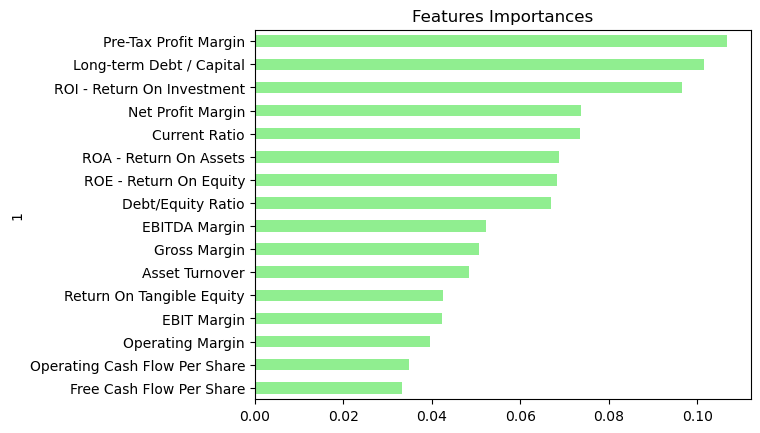

In [16]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)